# Markov Chains for Programmers
**Notes on the book by Ricardo Melo Czekster**

------

## Chapter 1

### Basic modelling primitives

Markov chains (MC) employ *states*, *transitions* and *values* decorating transitions to construct a directed graph which models a system.

- **Continuous Time Markov Chains (CTMC)** when working with durations (representated as rates), residence times in states.
- **Discrete Time Markov Chains (DTMC)** when decorating transitions with probabilities.

### What is a 'proper' MC?

- It must be possible to visit every state (not necessarily in one step).
- It must **not** be periodic, e.g returns to original state in pre-defined number of steps.

-------


## Chapter 2
## DTMC

An example of a DTMC with 2 states (lighting model)

```
          --0.5->
0.5<> (on)        (off)
          <-1.0--
```

If we want to find the final probability vector $\pi$, we can represent the MC as a matrix, where each row must sum to 1.

|         |  on  | off  |
|---------|------|------|
| **on**  | 0.50 | 0.50 |
| **off** | 1.00 | 0.00 |

There are several ways of obtaining $\pi$, one example if the **power matrix method**, where we multiply this matrix by itself repeatedly until it converges to stable values.

In [1]:
import numpy as np

m = np.array([
    [0.5, 0.5],
    [1.0, 0.0]
])

for _ in range(6):
    print(m)
    m = m @ m
    print()

[[0.5 0.5]
 [1.  0. ]]

[[0.75 0.25]
 [0.5  0.5 ]]

[[0.6875 0.3125]
 [0.625  0.375 ]]

[[0.66796875 0.33203125]
 [0.6640625  0.3359375 ]]

[[0.66667175 0.33332825]
 [0.66665649 0.33334351]]

[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]



Here we see that after a few iterations $\pi_{\text{on}}$ = 0.6667 and $\pi_{\text{off}}$ = 0.3334. This means that in this lighting model, we would expect to find the switch in the on position 66% of the the time, and the off position 33% of the time.

We can also calculate this much the same way using a vector-matrix multiplication rather than matrix-matrix multiplication, althought it typically takes more iterations to converge.

In [2]:
x = np.array([0.5, 0.5])

y = np.array([
    [0.5, 0.5],
    [1.0, 0.0]
])

for i in range(20):
    print(i, x)
    x = x @ y

0 [0.5 0.5]
1 [0.75 0.25]
2 [0.625 0.375]
3 [0.6875 0.3125]
4 [0.65625 0.34375]
5 [0.671875 0.328125]
6 [0.6640625 0.3359375]
7 [0.66796875 0.33203125]
8 [0.66601562 0.33398438]
9 [0.66699219 0.33300781]
10 [0.66650391 0.33349609]
11 [0.66674805 0.33325195]
12 [0.66662598 0.33337402]
13 [0.66668701 0.33331299]
14 [0.66665649 0.33334351]
15 [0.66667175 0.33332825]
16 [0.66666412 0.33333588]
17 [0.66666794 0.33333206]
18 [0.66666603 0.33333397]
19 [0.66666698 0.33333302]


**Note that for the vector-matrix mutiplication method, it doesn't matter what the initial vector is as long as it sums to 1.**


## The belfast weather model

Given a model of Belfast's weather as a DTMC model:

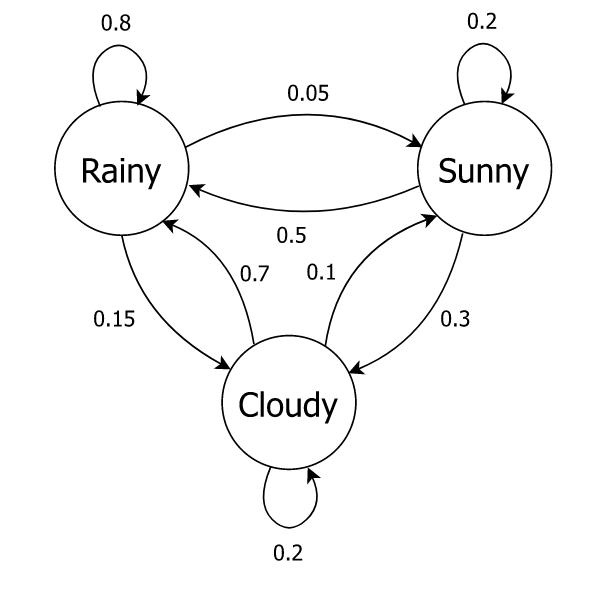

We can assume the probability of rainy and cloudy states will be high. As a matrix with column/row ordering of (rainy, cloudy, sunny) it looks like:

$$
X = \begin{pmatrix}
0.80 & 0.15 & 0.05 \\
0.70 & 0.20 & 0.10 \\
0.50 & 0.30 & 0.20 
\end{pmatrix}
$$

Solving this with the vector-matrix multiplication method:

In [3]:
x = np.array([
    [0.8, 0.15, 0.05],
    [0.7, 0.2, 0.1],
    [0.5, 0.3, 0.2]
])

v = np.array([1.0, 0.0, 0.0])


for i in range(10):
    v = v @ x
    print(i, v)

0 [0.8  0.15 0.05]
1 [0.77  0.165 0.065]
2 [0.764 0.168 0.068]
3 [0.7628 0.1686 0.0686]
4 [0.76256 0.16872 0.06872]
5 [0.762512 0.168744 0.068744]
6 [0.7625024 0.1687488 0.0687488]
7 [0.76250048 0.16874976 0.06874976]
8 [0.7625001  0.16874995 0.06874995]
9 [0.76250002 0.16874999 0.06874999]


We get:
$\pi_{\text{rainy}}$ = 0.762,
$\pi_{\text{cloudy}}$ = 0.168,
$\pi_{\text{sunny}}$ = 0.068, 

So it rains in Belfast a lot.


### Forward simulation

- Define the desired number of samples (visits)
- Define an initial start state
- Modify the probability matrix of the DTMC to withold the cumulative probabilties on each position (that will easy the selection of the next state)

For example suppose a three state DTMC with the following probabilities:

$$
X = \begin{pmatrix}
0.2 & 0.4 & 0.4 \\
0.1 & 0.2 & 0.7 \\
0.3 & 0.6 & 0.1 
\end{pmatrix}
$$

As a cumulative probability matrix (row-wise) it becomes:

$$
X\prime = \begin{pmatrix}
0.2 & 0.6 & 1.0 \\
0.1 & 0.3 & 1.0 \\
0.3 & 0.9 & 1.0 
\end{pmatrix}
$$

In [4]:
x = np.array([
    [0.2, 0.4, 0.4],
    [0.1, 0.2, 0.7],
    [0.3, 0.6, 0.1]
])
x_acc = np.cumsum(x, axis=1)
print(x_acc)

[[0.2 0.6 1. ]
 [0.1 0.3 1. ]
 [0.3 0.9 1. ]]


When making draws for each state, we can sample a number from a uniform distribution between 0 and 1 and see which state bin it falls into to determine our next state.

i.e for sample $s$:

if: $0.0\lt s \le0.2$, our next state is `0`

if: $0.2\lt s \le0.6$, our next state is `1`

if: $0.6\lt s \le1.0$, our next state is `2`

In [5]:
s = np.random.uniform()
next_state = np.argmin(x_acc[0,:] < s)

print(f"s = {s:.4f}")
print(x_acc[0,:])
print(f"next state = {next_state}")

s = 0.3387
[0.2 0.6 1. ]
next state = 1


So for the complete process:

1. Check if number of samples has reached the desired value, if yes, stop the process and go directly to step 7.
2. Add the visit to this state in a counting vector witholding all visits.
3. Draw a uniform random number.
4. Look at the transition from that state.
5. If the probability is less than the position in the cumulative matrix, jump to that position.
6. Repeat  steps 1-5.
7. Compute visit statistics (divide each position of the counting visits vector by the total number of samples).

In [6]:
def forward_sim(x: np.array, n: int = 1000) -> np.array:
    """
    x: DTMC model as an n*n array
    n: number of samples in simulation
    Returns: probability vector for the states in x
    """
    counter = np.zeros(x.shape[0], dtype=int)
    x_acc = np.cumsum(x, axis=1)
    state = 0
    for _ in range(n):
        s = np.random.uniform()
        state = np.argmin(x_acc[state,:] < s)
        counter[state] += 1
    return counter / n

So trying a forward simulation on the Belfast weather model

In [7]:
x = np.array([
    [0.8, 0.15, 0.05],
    [0.7, 0.2, 0.1],
    [0.5, 0.3, 0.2]
])

pi = forward_sim(x)
print(pi)

[0.75  0.183 0.067]


## Direct solution method

We can also solve this (calculating $\pi$) using linear equations, where $\pi$ is a vector of unknowns.


$$
\left[\pi_1 \pi_2 \pi_3  \right] \times
\begin{pmatrix}
0.8 & 0.15 & 0.05 \\
0.7 & 0.2 & 0.1 \\
0.5 & 0.3 & 0.2 
\end{pmatrix} = \begin{bmatrix}
\pi_1\\
\pi_2\\
\pi_3\\
\end{bmatrix}
$$

So after some re-arranging we have to solve the following:

$$
\left\{ \begin{array}{cl}
(0.8-1)\pi_{1} + 0.7\pi_2 + 0.5\pi_3 & = \ 0 \\
0.15\pi_1 + (0.2-1)\pi_2+0.3\pi_3 & = \ 0 \\
0.05\pi_1+0.1\pi_2+(0.2-1)\pi_3 & = \ 0 \\
1\pi_1+1\pi_2+1\pi_3 & = \ 1
\end{array} \right.
$$

In [8]:
import scipy.linalg

m = np.vstack([
    x.T - np.identity(x.shape[0]),
    np.ones(x.shape[0])
])

pi, *_ = scipy.linalg.lstsq(m, np.array([0, 0, 0, 1]))
print(pi)

[0.7625  0.16875 0.06875]


----------

## Chapter 3
## CTMC

Think of state durations instead of probabilities, think of time spent in the state (residence) and how it transitions to other states using $\text{rate} = \frac{1}{\text{duration}}$ to represent the rate *out* of the state.

The negative sum of all the outgoing rates is used on the self-reference transition, in order to even out the rates so each row in the model will sum to 0.


### Infinitesimal Generator

The process to model a CTMC is difference from a DTMC because we must use a different kind of matrix called an *infinitesimal generator* (IG). It's used to cancel out the diagonal self-loops in the model, and substituting it with the negative sum of rates - balancing rates in and rates out.

So using the lighting model:

```
     --1->
(on)       (off)
     <-2-- 
```


the IG matrix ($Q$) for this model is:

$$
Q = \begin{matrix}
-1 & 1 \\
2  & -2
\end{matrix}
$$


For a generic model with 4 states:

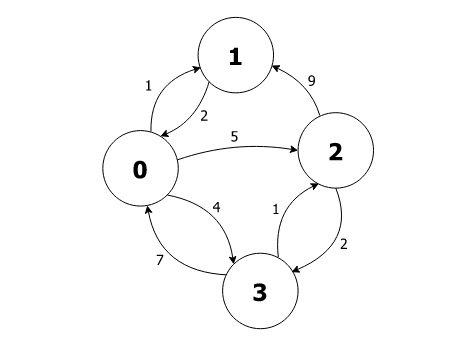

The IF for this model is:

$$
Q = \begin{pmatrix}
-10 & 1 & 5 & 4 \\
2 & -2 & 0 & 0 \\
0 & 9 & -11 & 2\\
7 & 0 & 1 & -8
\end{pmatrix}
$$


### Computing the embedded DTMC

Given an IG, we can convert the CTMC into a DTMC by doing the following:

1. Let $Q$ be an IG model
2. Let $I^n$ be an identity matrix of order $n$
3. Find max$_Q$, i.e the maximum value of $Q_{ij}$
  - This value will always be located in the diagonal
  - Find the maximum abs value, and then use it with its sign.
4. For each element of $Q$ compute $M\prime_{ij} = I_{ij} - \frac{Q_{ij}}{\text{max}_Q}$  

In [37]:
Q = np.array([
    [-10, 1, 5, 4],
    [2, -2, 0, 0 ],
    [0, 9, -11, 2],
    [7, 0, 1, -8 ]
])

def max_q(x):
    """find the max abs value of x with its sign"""
    x_abs = abs(x)
    x_abs_max = x_abs.max()
    i, j = np.transpose(np.nonzero(x_abs == x_abs_max))[0]
    return x[i, j]


def ctmc_to_dtmc(q):
    i = np.identity(q.shape[0])
    q_max = max_q(q)
    return i - (q / q_max)


q_dtmc = ctmc_to_dtmc(Q)
print(q_dtmc)

[[0.09090909 0.09090909 0.45454545 0.36363636]
 [0.18181818 0.81818182 0.         0.        ]
 [0.         0.81818182 0.         0.18181818]
 [0.63636364 0.         0.09090909 0.27272727]]


We can now use the usual DTMC methods to find $\pi$ for this model.


### Forward simulations for CTMC

This follows the same idea as for DTMC.

1. Given a CTMC model as IG matrix $Q$
2. Calculate $Q\prime$ where $Q\prime_{ij} = Q_{ij} - \text{max}_Q \times I_{ij}$
3. From an initial state $S_0$, draw a number from an exponential distribution and then visit the next state.


#### Drawing from the exponential distribution

$$
\text{exp(rate)} = \left(\frac{-1}{\text{rate}}\right) \times \log{(1 - \text{Unif}(0;1), e)}
$$ 

In [69]:
rates = np.array([4, 9, 1, 5])
#unif_samples = np.random.uniform(size=rates.shape[0])
unif_samples = np.array([0.302, 0.829, 0.0528, 0.607]) # numbers from example in book
exp_samples = (-1 / rates) * np.log(1 - unif_samples)
ranked = np.argsort(exp_samples).argsort()
next_state = np.argmin(ranked)

So given matrix

$$
Q = \begin{pmatrix}
-10 & 1 & 5 & 4 \\
2 & -2 & 0 & 0 \\
0 & 9 & -11 & 2\\
7 & 0 & 1 & -8
\end{pmatrix}
$$


In [84]:
def rankdata(x: np.array) -> np.array:
    return np.argsort(x).argsort()


def next_state(rates: np.array) -> int:
    unif_samples = np.random.uniform(size=rates.shape[0])
    exp_samples = (-1 / rates) * np.log(1 - unif_samples)
    ranked = rankdata(exp_samples)
    return np.argmin(ranked)


def make_q_prime(q: np.array) -> np.array:
    q_max = max_q(q)
    q_i = np.identity(q.shape[0])
    return q - q_max * q_i
    

def forward_sim_ctmc(x: np.array, n: int = 1000) -> np.array:
    """
    x: CTMC model as an n*n array
    n: number of samples in simulation
    Returns: probability vector for the states in x
    """
    counter = np.zeros(x.shape[0], dtype=int)
    state = 0
    for _ in range(n):
        state = next_state(x)
        counter[state] += 1
    return counter / n

print("Q")
print(Q)
q_prime = make_q_prime(Q)
print("\nQ`")
print(q_prime.astype(int))

forward_sim_ctmc(q_prime)

Q
[[-10   1   5   4]
 [  2  -2   0   0]
 [  0   9 -11   2]
 [  7   0   1  -8]]

Q`
[[1 1 5 4]
 [2 9 0 0]
 [0 9 0 2]
 [7 0 1 3]]


<ipython-input-84-26521085878f>:7: RuntimeWarning: divide by zero encountered in true_divide
  exp_samples = (-1 / rates) * np.log(1 - unif_samples)


array([0.093, 0.096, 0.463, 0.348])